In [3]:
#Homework 3
#Tianyang Chen
#Support Vector Machines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from math import log
from sklearn import svm
import pylab as pl

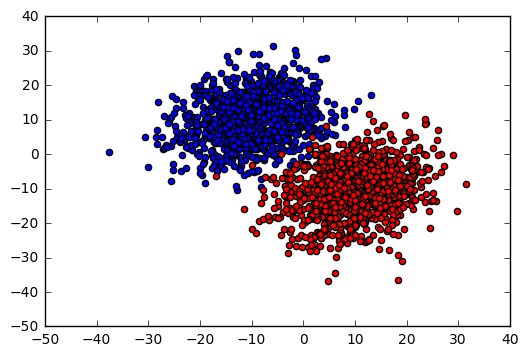

In [4]:
#number of samles in each component
N_train=1000 

#generate trainging data
mean = [-10, 10]
cov = [[50, 10], [10, 50]]
x, y = np.random.multivariate_normal(mean, cov, N_train).T
mean2 = [10, -10]
cov2 = [[50, 10], [10, 50]]
x2, y2 = np.random.multivariate_normal(mean2, cov2, N_train).T
plt.scatter(x, y, c='b')
plt.scatter(x2, y2, c = 'r')

#rearrange the training data
x_train = np.row_stack(((np.column_stack((x, y))),(np.column_stack((x2, y2)))))
y_train = (np.row_stack(((np.zeros((N_train,1))),(np.ones((N_train,1)))))).ravel()


training error(linear kernel):0.0115
testing error(linear kernel):0.0124
training error(gaussian kernel):0.008
testing error(gaussian kernel):0.0134


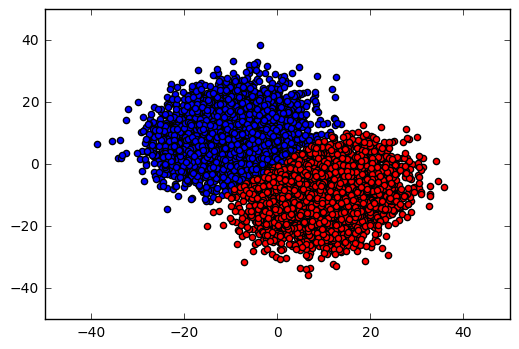

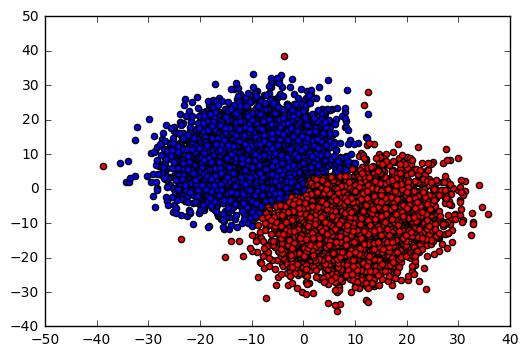

In [7]:
#number of testing data
N=5000

#generate and rearrange testing data
mean3 = [-10, 10]
cov3 = [[50, 10], [10, 50]]
x3, y3 = np.random.multivariate_normal(mean, cov, N).T
mean4 = [10, -10]
cov4 = [[50, 10], [10, 50]]
x4, y4 = np.random.multivariate_normal(mean2, cov2, N).T
x_test = np.row_stack(((np.column_stack((x3, y3))),(np.column_stack((x4, y4)))))
y_test = (np.row_stack(((np.zeros((N,1))),(np.ones((N,1)))))).ravel()

#SVM with linear kernel
svc = svm.SVC(kernel='linear')
svc.fit(x_train, y_train)
train_error_linear = 1 - svc.fit(x_train, y_train).score(x_train, y_train)
testing_error_linear = 1 - svc.fit(x_train, y_train).score(x_test, y_test)
print "training error(linear kernel):" + str(train_error_linear)
print "testing error(linear kernel):" + str(testing_error_linear)
y_predict = svc.predict(x_test)
plt.figure()
plt.scatter(x_test[np.where(y_predict==0)[0], 0], x_test[np.where(y_predict==0)[0], 1], c='b')
plt.scatter(x_test[np.where(y_predict==1)[0], 0], x_test[np.where(y_predict==1)[0], 1], c='r')

#SVM with gaussian kernel
svc2 = svm.SVC(kernel='rbf', gamma=0.1)
svc2.fit(x_train, y_train)
train_error_gaussian = 1 - svc2.fit(x_train, y_train).score(x_train, y_train)
testing_error_gaussian = 1 - svc2.fit(x_train, y_train).score(x_test, y_test)
print "training error(gaussian kernel):" + str(train_error_gaussian)
print "testing error(gaussian kernel):" + str(testing_error_gaussian)
y_predict2 = svc2.predict(x_test)
plt.figure()
plt.scatter(x_test[np.where(y_predict2==0)[0], 0], x_test[np.where(y_predict2==0)[0], 1], c='b')
plt.scatter(x_test[np.where(y_predict2==1)[0], 0], x_test[np.where(y_predict2==1)[0], 1], c='r')